In this issue of Beacondigest, in addition to our recurring analysis of network metrics we also aim to analyze startegic considerations in the setting of Proof-of-Stake PoS Ethereum Staking through the concept of Oceanic Games<span class="reference bibliography" refid="milnor1978values"></span>. The notion was first put forth by J.W Milnor and L.S Shapley in 1978. It has since then been used to study decision-making strategies especially in weighted voting systems. The concept was adapted to Blockchain mining by researchers Nikos Leonardos, Stefanos Leonardos and Georgios Piliouras in their paper _Oceanic Games: Centralization Risks and Incentives in Blockchain Mining_<span class="reference bibliography" refid="leonardos2020oceanic"></span>.

In this notebook we extend this analysis to Eth staking to estimate the values per unit resources for major staking "entities".

The outline of this notebook is as follows:

- We start off by presenting the Oceanic Games model and define all relevant terms.
- We then apply the concepts in the setting of Ethereum staking and present our results.
- We finally conclude by listing some shortcomings of this notebook and our analysis.

## An Introduction to Oceanic Games

The first question we aim to answer is, what are oceanic games? In the context of corporate governance, they are a class of games that involve two types of players:

1. Large players, also known as "atomic players", who own a significant portion of the company's total shares
2. An *ocean* of "non-atomic" players that each own an infinitesimal portion of the company's total shares.

The main focus while analyzing such games is to measure the value of an entity for each unit of resource given the distribution of resources among shareholders.

As seen in a lot of literature <span class="reference bibliography" refid="leonardos2020oceanic aumann1964markets shapiro1978values shitovitz1973oligopoly"></span> the *value* of a resource has a lot more to it than just the amount of resource that are in one's possession.

For example, in the context of Blockchain mining: Consider a party having access to 51% of all mining resources vs one having access to 49% of all mining resources. While the difference is only 2%, the possession in the first case is more *valuable* as now the party has complete control over the Blockchain. This can be extended to the case where many miners collude with each other: If a miner has access to 49% of all mining resources and another miner 2%, their combined possession is worth more than in the first miner had access to only 47% of the total resources. 

Thus the aim of our analysis is to measure the **value of resources** needed for staking on the Beacon Chain **per unit resource** for major staking entities and the ocean of small validators. 

These major staking entities can be thought of as PoS parallels to mining pools under Proof-of-Work (PoW).

## Introducing the Oceanic Games Model

Without going too much into the technical details, here is the overview of the Oceanic Games model:

- **Stakers**: They refer to the block proposers and validators that take part in the PoS consensus after making their initial deposit of 32 ETH. Stakers are made up of two important components:
    
    - Major Stakers: A *set* of entities that control a significant portion of the ETH staked on the beacon chain, 
    - The Ocean: An *interval* of infinitesimal stakers.
       
- **Resources**: Refers to the native cryptocurrency (ETH) deposited by stakers to take part in PoS consensus. In our analysis we measure resources in terms of the fraction of staked ether that an entity controls.


- **Majority Quota**: A common notion in weighted voting systems, in our context it refers to the minimum amount resources controlled by a single entity to raise an alert. We assume the quota of our oceanic game is 0.33, as a single entity controlling more than 1/3rd of the resources could mean that they could bring about a great deal of harm to the protocol if they wish to. (Read: https://www.talentica.com/blogs/why-bft-protocols-cannot-have-13-dishonest-parties/)


- **Values**: Under this current model, we aim to calculate a value for each major staker and the entirety of the ocean. Without going into the mathematical details, we can think of the value of a staker $i$, $v_i$, as the probability that, that staker will be the crucial entity to turn a random coalition of stakers from losing (total resources of the coalition without $i$ are less than $q$) to winning (total resources of the coalition with $i$ are equal to or greater than $q$) <span class="reference bibliography" refid="shapiro1978values"></span>.
    

- **Value per unit resource**: As the name suggests, it is simply the value of a staker divided by his resources!

## Analysis

Now for the interesting portion of the notebook, applying the model on Ethereum PoS consensus! The first step would be to identify the stakers, both the major stakers and the ocean as well as the resources they possess.

But the first stage, as always, is data collection. We collect data pertaining to the eth1 deposits made by the first 163400 validators who were activated using [beaconcha.in's API](https://beaconcha.in/api/v1/docs/index.html). We then identify which entities control large portions of the total ETH staked on the Beacon Chain

In [1]:
#Import all the modules 

import requests
import json
import csv
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
from time import *
import plotly.express as px
import plotly.io as pio
pd.options.plotting.backend = "plotly"
pio.renderers.default = "plotly_mimetype+notebook_connected"
import plotly.graph_objects as go
import math

In [2]:
# validator_staking = {}

# with open('api_key.txt', 'r') as api_file:
#     api_key = api_file.read()

# for i in range(0,163399,100):
#     str1 = ''

#     for j in range(99):
#         str1 = str1 + str(i+j) + ','
    
#     str1 = str1 + str(i+99)
    
#     x = requests.get('https://beaconcha.in/api/v1/validator/{}/deposits?api_key={}'.format(str1, api_key))
#     #Add a sleep to stay within the call rate limits
#     sleep(6)
    
#     data = x.json()['data']
    
#     for t in data:
#         if(validator_staking.get(t['from_address']) != None):
#             validator_staking[t['from_address']] += t['amount']
#         else:
#             validator_staking[t['from_address']] = t['amount']

In [3]:
# with open('api_key.txt', 'r') as api_file:
#     api_key = api_file.read()
    
# x = requests.get('https://beaconcha.in/api/v1/validator/{}/deposits?api_key={}'.format(163400, api_key))
# t = x.json()['data']
# if(validator_staking.get(t['from_address']) != None):
#     validator_staking[t['from_address']] += t['amount']
# else:
#     validator_staking[t['from_address']] = t['amount']

In [4]:
# #Writing the dictionaries to csv files

# with open('staking_pools.csv','w') as result_file:
#     wr = csv.writer(result_file, dialect='excel')
#     for key, value in validator_staking.items():
#         wr.writerow([key,value])

In [5]:
df = pd.read_csv('staking_pools.csv', header= None, names = ["address","stake"])
df['percentage_stake'] = (df['stake']/df['stake'].sum())
print(len(df))
print(len(df)/163400)

28934
0.1770746634026928


At this point, we see a very interesting result! When we look into the wallet addresses of the deposit contracts that were used to activate 163400 validators, we notice that only 28934 distinct wallet addresses activated these validators. This means that only about **17.7%** of these deposits were made by unique addresses. 

In [6]:
sorted_df = df.sort_values('percentage_stake',ascending=False)
sorted_df.insert(1, 'ID', range(1, 1 + len(df)))
sorted_df = sorted_df[sorted_df.columns[1:4]]
print(sorted_df.head(n=10))
#print(sorted_df.head(n=6))
#print(13.911047+2.176371+1.582760+1.488614+1.223292+1.050894)

       ID            stake  percentage_stake
3345    1  728160000000000          0.139110
5012    2  113920000000000          0.021764
2479    3   82848000000000          0.015828
9722    4   77920000000000          0.014886
1153    5   64032000000000          0.012233
4824    6   55008000000000          0.010509
601     7   48768000000000          0.009317
5870    8   48736000000000          0.009311
4789    9   45120000000000          0.008620
22874  10   44192000000000          0.008443


The above table captures the 10 wallet addresses arranged in the descending order of the percentage of staked ether they possess. [The addresses have not been displayed for the sake of the privacy of these entities]. We consider the first 6 entities to be atomic players or major stakers since they control more than 1% of all the ETH staked. The remaining ones are considered to be oceanic.

Out of these 6 entities, only 2 have public tags to their wallet address from which we can deduce which institution they represent. The first one that controls 13.9% is the US-based exchange Kraken, and the third largest one that controls about 1.58% of the network belongs to the financial institution Bitcoin Suisse. 

Using this intial distribution we can now try and estimate the values per unit resource for the 6 major staking entities and the entirety of the ocean. For this, we first used the publicly available [ssocean software](http://homepages.warwick.ac.uk/~ecaae/ssocean.html) to find the ssindices of the atomic and non-atomic player and we finally divide this by the amount of resources they each possess to find their values per unit resource. 

In [7]:
ss_index = [0.161317,0.021623,0.015633,0.014690,0.012041,0.010327,0.764370]
resource_percentage = [0.139110,0.021764,0.015828,0.014886,0.012233,0.010509,0.785700]

value_per_unit_resource = []

for i in range(7):
    value_per_unit_resource.append(ss_index[i]/resource_percentage[i])
    
x_axis = [1,2,3,4,5,6,7]

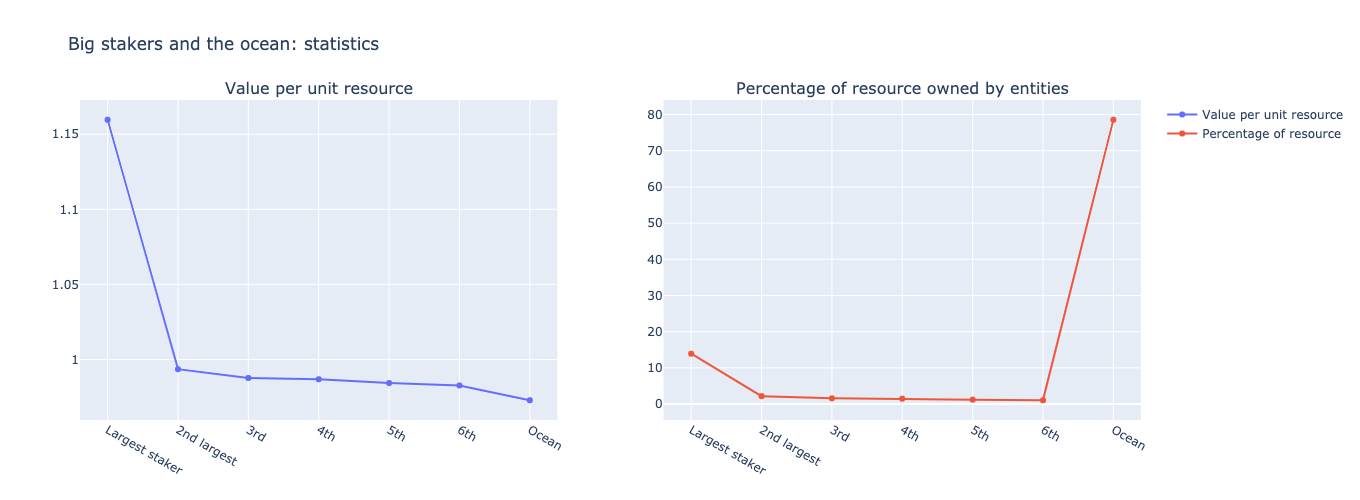

In [8]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=["Value per unit resource", "Percentage of resource owned by entities"]
)

fig.add_trace(
    go.Scatter(x=x_axis, y=value_per_unit_resource, name="Value per unit resource"),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=x_axis, y=[r * 100 for r in resource_percentage], name="Percentage of resource"),
    row=1, col=2
)

fig.update_layout(
    height=500,
    width=1000,
    title_text="Big stakers and the ocean: statistics"   
)
fig.update_xaxes(
    row=1, col=1,
    tickmode="array", tickvals=np.arange(1,8), ticktext=["Largest staker", "2nd largest", "3rd", "4th", "5th", "6th", "Ocean"]
)
fig.update_xaxes(
    row=1, col=2,
    tickmode="array", tickvals=np.arange(1,8), ticktext=["Largest staker", "2nd largest", "3rd", "4th", "5th", "6th", "Ocean"]
)
fig.show()

Hence, the results clearly reveal that the higher the resource, the higher the value per unit resource which is consistent with the findings of <span class="reference bibliography" refid="leonardos2020oceanic"></span>.

### Limitations of the Notebook

1) We make an assumption that among 163400 the number of deactivated validators are minimal and are negligible. In reality there have been about 140 validators who have successfully exited and another 140 who have been slashed. Thus they make up close to 0.17% of the total population of the validators we've considered

2) In this notebook, we classify "entities" based on their eth1 address. In reality however it can be possible that a single entity can make deposits with more than one eth1 address. The logical next step to this analysis is to identify all the addresses that belong to a single entity and further aggregate them. We will do so in the subsequent notebooks.

## The Beacon Chain Digest - June 8th

We also continue our running analysis of the Beacon Chain through the lens of our metrics 5 metrics. In this notebook, we take a look at epochs 39121 - 42211 ( May 24th, 8:54AM GMT to June 7th, 2:30AM GMT). As always we start off with collecting data and processing the data.

In [9]:
files = ["attestor_slashing", "proposer_slashing", "block_count", "participation_rate", "exit_count", "deposits"]
dfs = []

for file in files:
    df = pd.read_csv(f"{file}.csv", header=None, names=["epoch", file])
    df.dropna(subset=["epoch"], inplace=True)
    dfs += [df[[file]]] # We don't want the epoch column

df = pd.concat([df[["epoch"]]] + dfs, axis=1) # Concat everything, with the epoch column first
df["participation_rate"] *= 100 # Set to percentages
df = df[df.epoch < max(df["epoch"])] # Remove last epoch (queried too soon)
df["epoch"] = df["epoch"].astype(int)

### Attester and proposer slashing

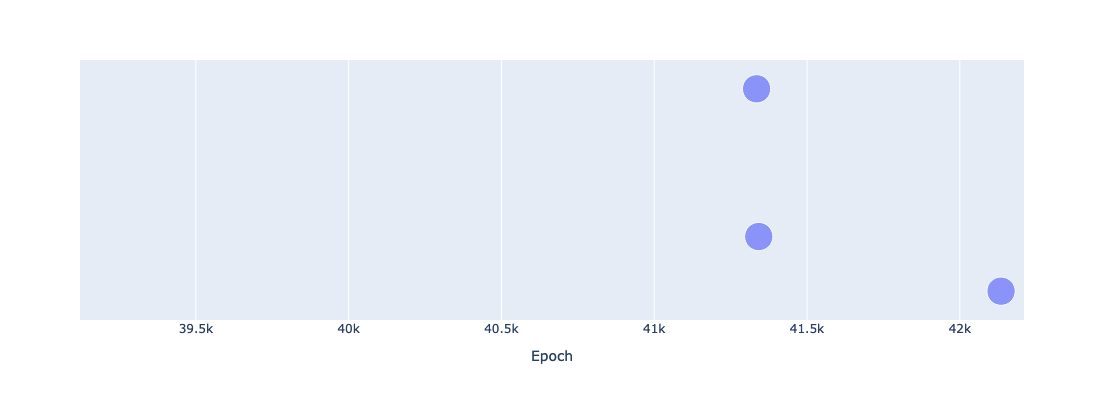

In [10]:
rng = np.random.default_rng(42)
df['temp'] = rng.uniform(0, 10, len(df["epoch"]))
fig = px.scatter(
    df[df.attestor_slashing > 0], x = 'epoch', y = 'temp', size = 'attestor_slashing',
    size_max = 20, width = 800, height = 400, labels = {"epoch": "Epoch"})
fig.update_xaxes(range=(min(df["epoch"]), max(df["epoch"])))
fig.update_yaxes(visible=False)

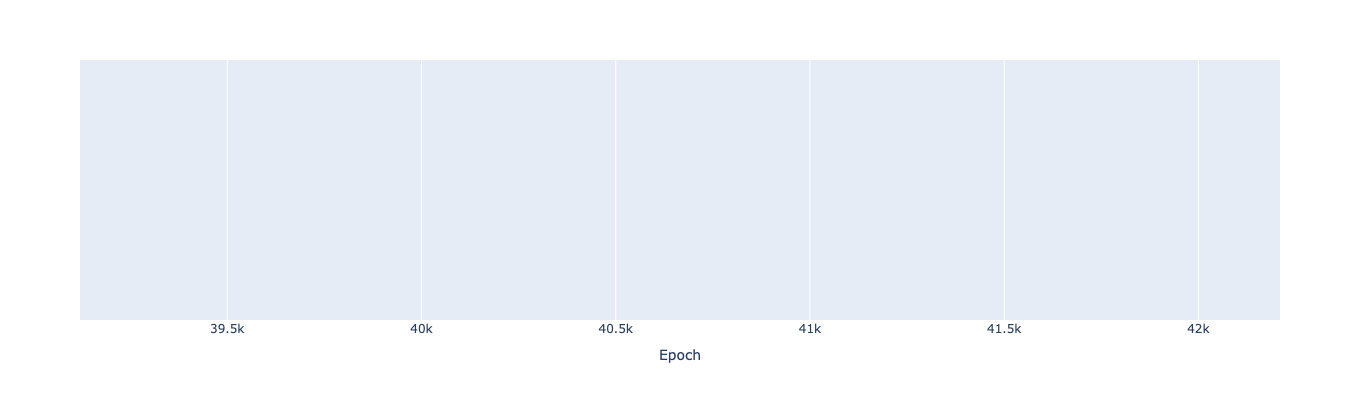

In [11]:
fig = px.scatter(
    df[df.proposer_slashing > 0], x = 'epoch', y = 'temp', size = 'proposer_slashing',
    size_max = 20, width = 800, height = 400, labels = {"epoch": "Epoch"})
fig.update_xaxes(range=(min(df["epoch"]), max(df["epoch"])))
fig.update_yaxes(visible=False)

Thus, we see that there have been 3 attester slashing events that occured at epochs 41335, 41342 and 42135 where one attester was slashed in each event.

There were also 0 proposer slashing events in this range of epochs. 

### Proposed blocks count

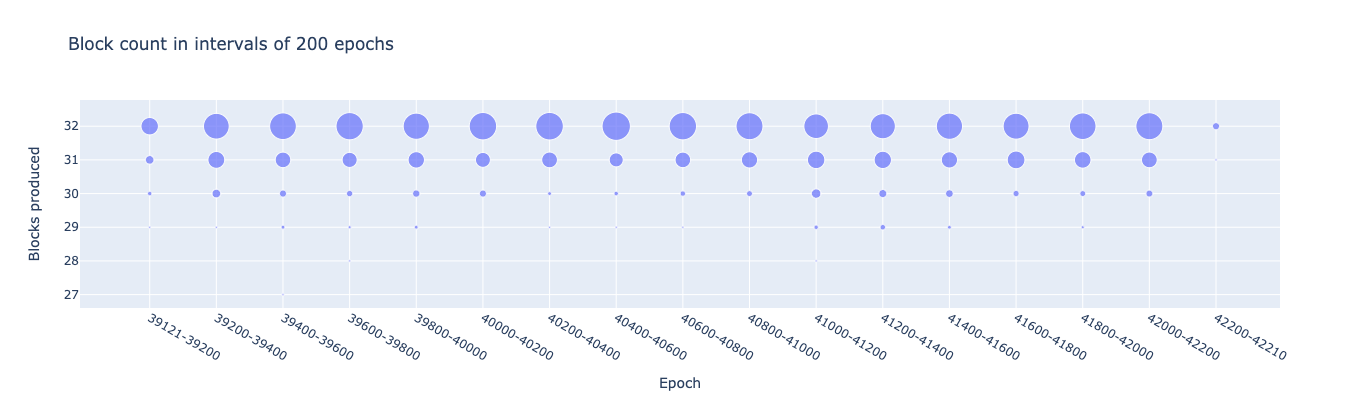

In [12]:
bucket_size = 200
df["bucket"] = np.floor_divide(df["epoch"], bucket_size)
df["n_bxs"] = 1
df_bucket = df[["bucket", "block_count", "n_bxs"]].groupby(["bucket", "block_count"]).sum("n_bxs").reset_index()
df_bucket["epoch"] = df_bucket.bucket.apply(
    lambda bucket: f"{max(min(df['epoch']), bucket * bucket_size)}-{min(max(df['epoch']), (bucket + 1) * bucket_size)}"
)

fig = px.scatter(df_bucket, x = 'epoch', y = 'block_count', size = 'n_bxs',
                 width=600, height=400, labels={ "block_count": "Blocks produced", "epoch": "Epoch", "n_bxs": "Count" },
                 title = f"Block count in intervals of {bucket_size} epochs")
fig

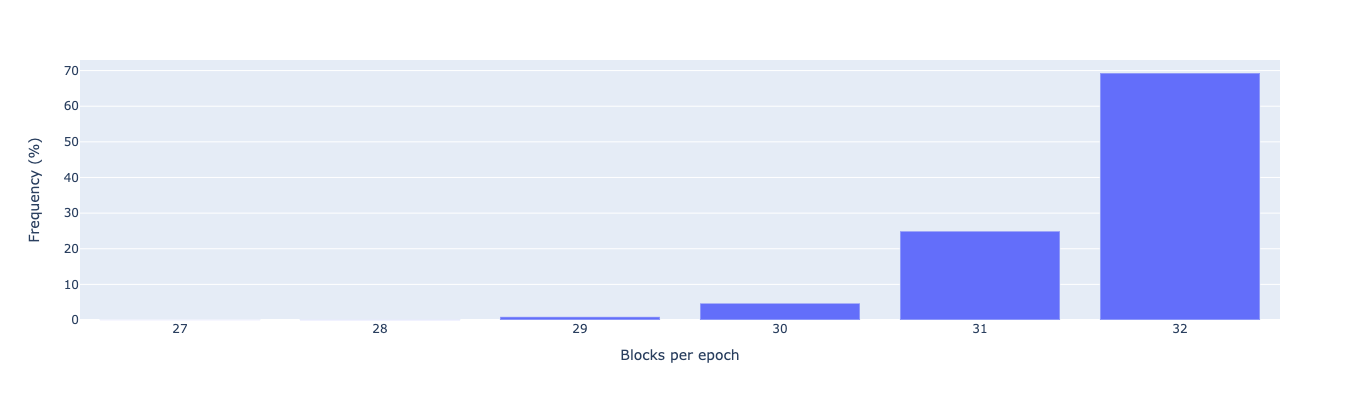

In [13]:
block_freq = df[['block_count']].value_counts(normalize=True).rename_axis('block_count').reset_index(name='freq')
block_freq["freq"] *= 100
px.bar(
    block_freq, x="block_count", y="freq", labels={"block_count": "Blocks per epoch", "freq": "Frequency (%)"},
    width=600, height=400
)

As we see from the plot and the statistics above, the proposed block counts for most epochs continues to be 32. This shows that overall the network is performing well. However this time the frequency with which the number of proposed blocks fell down to 29-30 is more and there was even one epoch when this number fell down to 27.

The network also seems to have performed "worse" in the period between epoch 41100 to 41500 and epoch 39500 to 39900 and "better" in the period between epoch 40300 to 40700. 

### Participation rate

In [14]:
bins = pd.IntervalIndex.from_tuples([(i,i+1) for i in range(int(min(df["participation_rate"])), 100)][::-1])
df["participation_bin"] = pd.cut(df["participation_rate"], bins)
df_bucket = df[["bucket", "participation_bin", "n_bxs"]].groupby(["bucket", "participation_bin"]).sum("n_bxs").reset_index()
epoch_names = df_bucket.bucket.apply(
    lambda bucket: f"{max(min(df['epoch']), bucket * bucket_size)}-{min(max(df['epoch']), (bucket + 1) * bucket_size)}"
)
df_bucket["epoch"] = epoch_names
df_bucket = df_bucket[["participation_bin", "n_bxs", "epoch"]].pivot(index="participation_bin", columns=["epoch"])

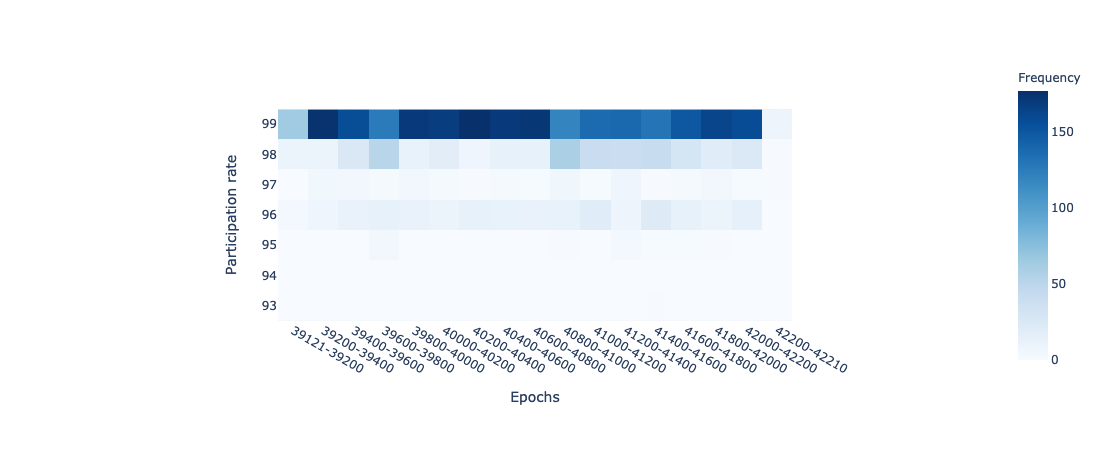

In [15]:
px.imshow(
    df_bucket.to_numpy(),
    labels=dict(x="Epochs", y="Participation rate", color="Frequency"),
    x = sorted(list(set(epoch_names))),
    y = [str(s) for s in np.flip(np.arange(int(min(df["participation_rate"])), 100))],
    color_continuous_scale='blues'
)

In [16]:
mean = df['participation_rate'].mean()
std = df['participation_rate'].std()
mini = min(df['participation_rate'])
median = df['participation_rate'].quantile(0.5)
maxi = max(df['participation_rate'])

print("           participation statistics")
print("-----------------------------------------------")
print("mean: {}".format(mean))
print("standard devidation: {}".format(std))
print("")
print("minimum: {}".format(mini))
print("median: {}".format(median))
print("maximum: {}".format(maxi))

           participation statistics
-----------------------------------------------
mean: 99.0554344742395
standard devidation: 0.823213998659587

minimum: 93.9082325
median: 99.3405521
maximum: 99.7540593


The above statistics are, as last time, signs of a healthy network!

At around 40800 the participation rate fell and gradually went back up, peaking towards the end!

The lowest participation rate for this range of epochs was around 94% and was recorded at epoch 41446. For most epochs however, the participation rate was >99%. 

### Exit counts

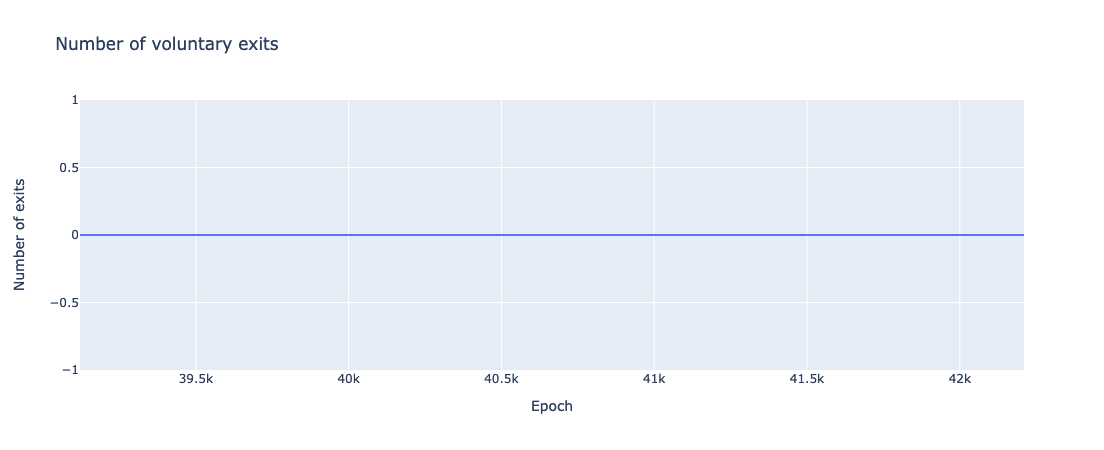

In [17]:
px.line(x=df['epoch'], y=df['exit_count'], labels = {"x": "Epoch", "y": "Number of exits"}, title = "Number of voluntary exits")

Thus, we see that there have been no exits among validators in this range of epochs.

### Deposit counts

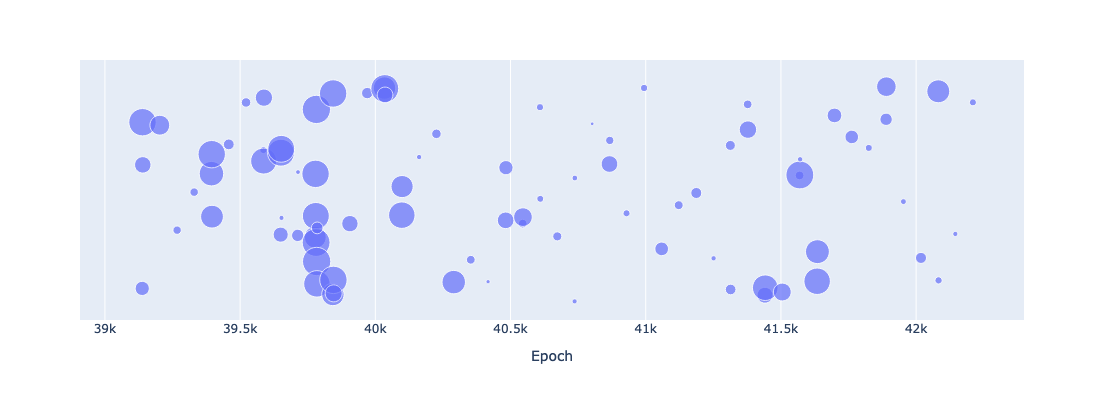

In [18]:
fig = px.scatter(
    df[df.deposits > 0], x = 'epoch', y = 'temp', size = 'deposits',
    size_max = 20, width = 800, height = 400, labels = {"epoch": "Epoch"})
fig.update_yaxes(visible=False)

The trend of having a handful of descrete epochs during which multiple validators were activated at once still holds for this range of epochs as well. 

In general the number of validators activated during the first half is significantly higher.

As seen in the previous section, the fact that 163400 validators were activated by just 28934 distinct wallets is strong evidence in favour of the hypothesis presented in the last notebook-that most of these large deposits were made by the same entity. But this cannot be confirmed without looking deeper into the data. 